In [ ]:
pip install python-bidi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
import scipy.stats as stats
from bidi.algorithm import get_display
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
%matplotlib inline
from PIL import Image

In [ ]:
#@title Stop Words Array (A set of words to filter from the visualization)
hebrew_stop_words = [
'אני',
'את',
'אתה',
'אנחנו',
'אתן',
'אתם',
'הם',
'הן',
'היא',
'הוא',
'שלי',
'שלו',
'שלך',
'שלה',
'שלנו',
'שלכם',
'שלכן',
'שלהם',
'שלהן',
'לי',
'לו',
'לה',
'לנו',
'לכם',
'לכן',
'להם',
'להן',
'אותה',
'אותו',
'זה',
'זאת',
'אלה',
'אלו',
'תחת',
'מתחת',
'מעל',
'בין',
'עם',
'עד',
'נגר',
'על',
'אל',
'מול',
'של',
'אצל',
'כמו',
'אחר',
'אותו',
'בלי',
'לפני',
'אחרי',
'מאחורי',
'עלי',
'עליו',
'עליה',
'עליך',
'עלינו',
'עליכם',
'לעיכן',
'עליהם',
'עליהן',
'כל',
'כולם',
'כולן',
'כך',
'ככה',
'כזה',
'זה',
'זות',
'אותי',
'אותה',
'אותם',
'אותך',
'אותו',
'אותן',
'אותנו',
'ואת',
'את',
'אתכם',
'אתכן',
'איתי',
'איתו',
'איתך',
'איתה',
'איתם',
'איתן',
'איתנו',
'איתכם',
'איתכן',
'יהיה',
'תהיה',
'היתי',
'היתה',
'היה',
'להיות',
'עצמי',
'עצמו',
'עצמה',
'עצמם',
'עצמן',
'עצמנו',
'עצמהם',
'עצמהן',
'מי',
'מה',
'איפה',
'היכן',
'במקום שבו',
'אם',
'לאן',
'למקום שבו',
'מקום בו',
'איזה',
'מהיכן',
'איך',
'כיצד',
'באיזו מידה',
'מתי',
'בשעה ש',
'כאשר',
'כש',
'למרות',
'לפני',
'אחרי',
'מאיזו סיבה',
'הסיבה שבגללה',
'למה',
'מדוע',
'לאיזו תכלית',
'כי',
'יש',
'אין',
'אך',
'מנין',
'מאין',
'מאיפה',
'יכל',
'יכלה',
'יכלו',
'יכול',
'יכולה',
'יכולים',
'יכולות',
'יוכלו',
'יוכל',
'מסוגל',
'לא',
'רק',
'אולי',
'אין',
'לאו',
'אי',
'כלל',
'נגד',
'אם',
'עם',
'אל',
'אלה',
'אלו',
'אף',
'על',
'מעל',
'מתחת',
'מצד',
'בשביל',
'לבין',
'באמצע',
'בתוך',
'דרך',
'מבעד',
'באמצעות',
'למעלה',
'למטה',
'מחוץ',
'מן',
'לעבר',
'מכאן',
'כאן',
'הנה',
'הרי',
'פה',
'שם',
'אך',
'ברם',
'שוב',
'אבל',
'מבלי',
'בלי',
'מלבד',
'רק',
'בגלל',
'מכיוון',
'עד',
'אשר',
'ואילו',
'למרות',
'אס',
'כמו',
'כפי',
'אז',
'אחרי',
'כן',
'לכן',
'לפיכך',
'מאד',
'עז',
'מעט',
'מעטים',
'במידה',
'שוב',
'יותר',
'מדי',
'גם',
'כן',
'נו',
'אחר',
'אחרת',
'אחרים',
'אחרות',
'אשר',
'או',
'חברה',
'מקום',
'עבודה',
'לעבוד',
'טוב',
'בה',
'ם',
'מאוד',
'הרבה',
'לדעתי',
'מעולה',
'בו',
'אחלה',
'טובה',
'טובים',
'החברה',
'בחברה',
'ממליץ',
'מומלץ',
'נחמד',
'הכל',
'למי',
'לעבודה',
'חברת',
'ממש',
'עובדים',
'בתחום',
'ולא',
'בסדר',
'המון',
'העובדים',
'ללא',
'נמוך',
'מתאים',
'שלא',
'העבודה',
'לעובדים',
'חסרונות',
'חוסר',
'לפעמים',


]

In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Data/whole_economy_data.csv', index_col=0)
df

,company_name,year_of_employment,year_of_resignation,ranking,review_essence,disadvantages,advantages,workplace_seniority
0,סופר פארם,2019,2019,2.0,"ניצול העובד עד המקסימום, תמורה לא בהתאם","שכר נמוך , הנהלה של החברה לא תומך ולא חושב על ...","הנחה בעת קנייה של מוצרים, ימי כיף ,משמרות נוחות ,",0
1,ללין,2016,2016,3.0,חברה גדולה טובה ומוצלחת .,שעות עבודה מעטות. שעות העבודה בשבת הן הין 6-8 ...,האווירה נעימה ומדהימה. שירות הלקוחות מעולה. כי...,0
2,טסקום,2016,2016,3.1,חברה טובה ואיכותית לעבודה,לא מצאתי שום חסרונות,ניהול טוב יחס טוב,0
3,תן ביס,2019,2019,3.0,ממש נהנה מכל רגע בו אני מגיע לעבודה,אין לי דבר אחד רע להגיד עליהם!,אהבתי את האווירה וזה חיזק אותי נפשית,0
4,ארנסט אנד יאנג,2016,2016,3.2,ממליץ בחום לרזומה מצויין,"אין הרבה חסרונות , אך אין גיבוש חברתי",נעים לסביבת עבודה איכותית,0
...,...,...,...,...,...,...,...,...
55979,פריקור,1990,2021,4.4,"ידע, טכנולוגיה, רגולציה והכרות עם שלל לקוחות",עבודה בשעות חריגות ולעיתים תחת לחץ זמנים,"עסק שהוא משפחה, מקום אידיאלי לעבודה עם צוות מק...",31
55980,משרד החינוך,1989,2020,4.1,תחושה של שליחות לאורך כל הדרך,אין הרבה לאן להתקדםהשתלמויות נתונות לחא חופש ב...,חופשיםשעות נוחותשנת שבתוןעניין רבהשתלמויות כמע...,31
55981,חברת החשמל,1989,2020,4.3,חברה שמתחדשת כל הזמן.,עדיין יש תפיסה של פעם. קידום בגלל וותק ולא כיש...,חברה שהיא מספיק גדולה כדי למצוא תחומי עניין שו...,31
55982,"קמ""ג",1989,2021,4.5,"הרגשת שליחות, אווירה משפחתית",עובדי מדינה עם כל המשתמע מכך,"ביטחון תעסוקתי, אווירה משפחתית, שכר הולם, עבוד...",32


<Figure size 2880x2880 with 0 Axes>

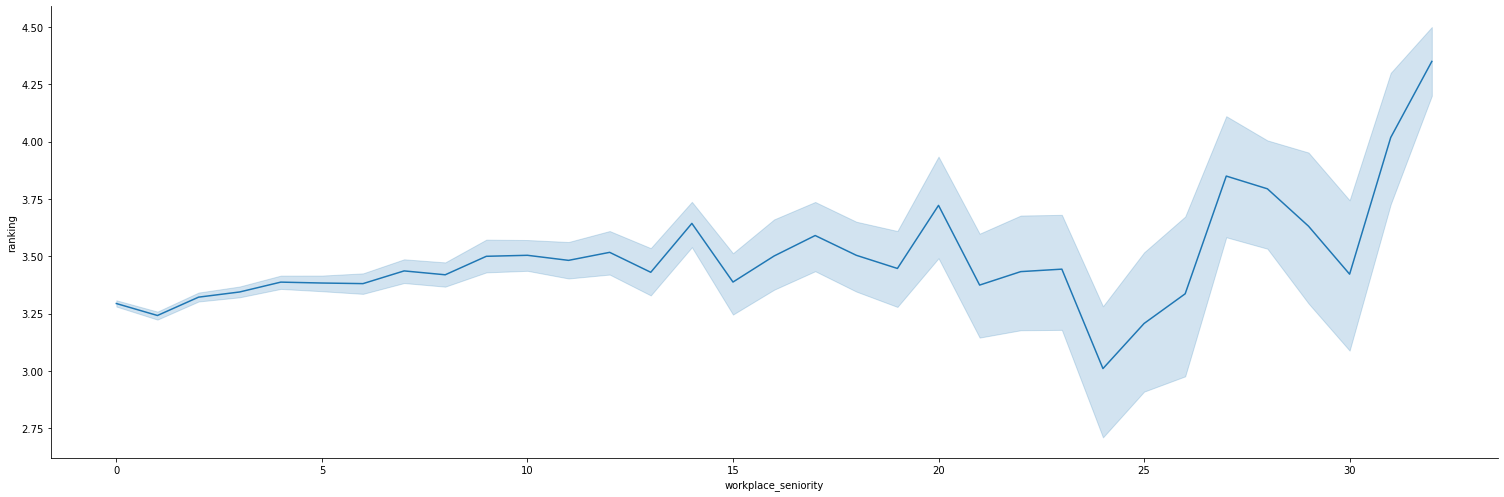

In [ ]:
plt.figure(figsize=(40,40))
sns.relplot(
    data=df, kind="line",
    x="workplace_seniority", y="ranking", height=7, aspect=3
)

**In the plot one can see some match in the satisfaction of the company and the seniority of the employee in the first years, however when an employee accumulates more significant seniority we see a less clear trend in satisfaction.**

In [ ]:
#Drop data that is less relevant
first_year_leaving_df = df.drop(df[df.year_of_employment < 2010].index)

#Drop 2021, Because in 2021 seniority can not exceed one year
first_year_leaving_df = first_year_leaving_df.drop(df[df.year_of_employment == 2021].index)

#Encode data, Division into less than one year of seniority, and more than one year of seniority
first_year_leaving_df.loc[df['workplace_seniority'] >= 1, 'workplace_seniority'] = '1+'

first_year_leaving_df

,company_name,year_of_employment,year_of_resignation,ranking,review_essence,disadvantages,advantages,workplace_seniority
0,סופר פארם,2019,2019,2.0,"ניצול העובד עד המקסימום, תמורה לא בהתאם","שכר נמוך , הנהלה של החברה לא תומך ולא חושב על ...","הנחה בעת קנייה של מוצרים, ימי כיף ,משמרות נוחות ,",0
1,ללין,2016,2016,3.0,חברה גדולה טובה ומוצלחת .,שעות עבודה מעטות. שעות העבודה בשבת הן הין 6-8 ...,האווירה נעימה ומדהימה. שירות הלקוחות מעולה. כי...,0
2,טסקום,2016,2016,3.1,חברה טובה ואיכותית לעבודה,לא מצאתי שום חסרונות,ניהול טוב יחס טוב,0
3,תן ביס,2019,2019,3.0,ממש נהנה מכל רגע בו אני מגיע לעבודה,אין לי דבר אחד רע להגיד עליהם!,אהבתי את האווירה וזה חיזק אותי נפשית,0
4,ארנסט אנד יאנג,2016,2016,3.2,ממליץ בחום לרזומה מצויין,"אין הרבה חסרונות , אך אין גיבוש חברתי",נעים לסביבת עבודה איכותית,0
...,...,...,...,...,...,...,...,...
54125,אלביט מערכות,2010,2021,4.0,"-בטחון תעסוקתי, גאווה ישראלית","-משכורת, בירוקרטיה, קשה להזיז את העגלה","-בטחון תעסוקתי, גאווה ישראלית",1+
54126,רפאל,2010,2021,3.2,בטחון תעסוקתי בלבד,משכורת נמוכה יחסית לשוקהעלאות אפסיות (300-500 ...,"בטחון תעסוקתיהסעות , חדר אוכל הפרשות וקרן השתלמות",1+
54128,רפאל,2010,2021,3.3,לא מספיק מתגמל את העשייה,משכורת נמוכה רווחה לא מספיק דואגת,"איזון עבודה בית , בטחון תעסוקתי",1+
54133,אמדוקס,2010,2021,2.6,ניהול כוחני וצבאי,ניהול כוחנישכר תנאים וקידום,חברה גדולהניוד בין תפקידים,1+


<Figure size 1080x720 with 0 Axes>

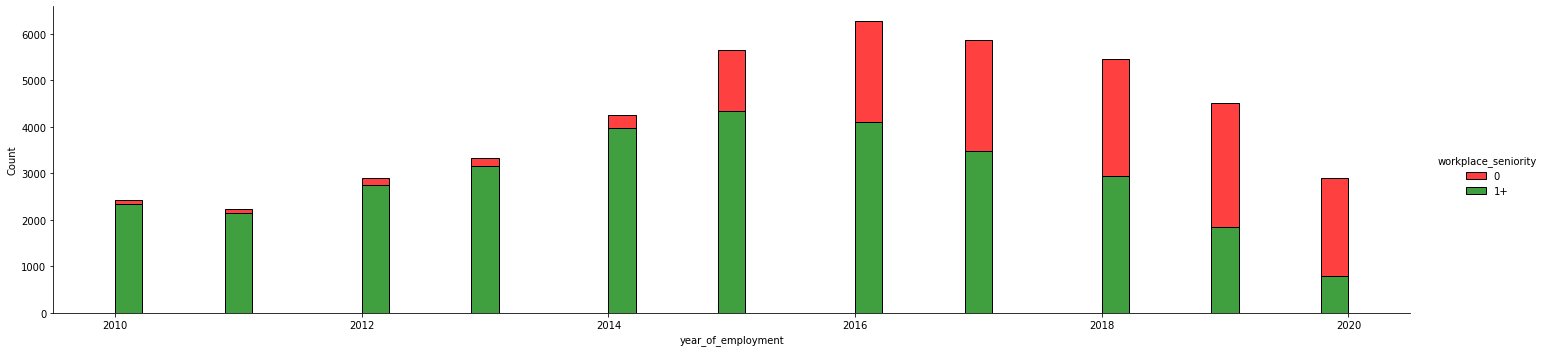

In [ ]:

plt.figure(figsize=(15,10))
sns.displot(first_year_leaving_df, x="year_of_employment", hue="workplace_seniority", aspect=4, height=5, palette = ['r','g'], multiple="stack")

**In the following plot we see that employees who have been employed in recent years are more likely to leave early, as expected from the "infidelity" of Generation Z in the workplace.**

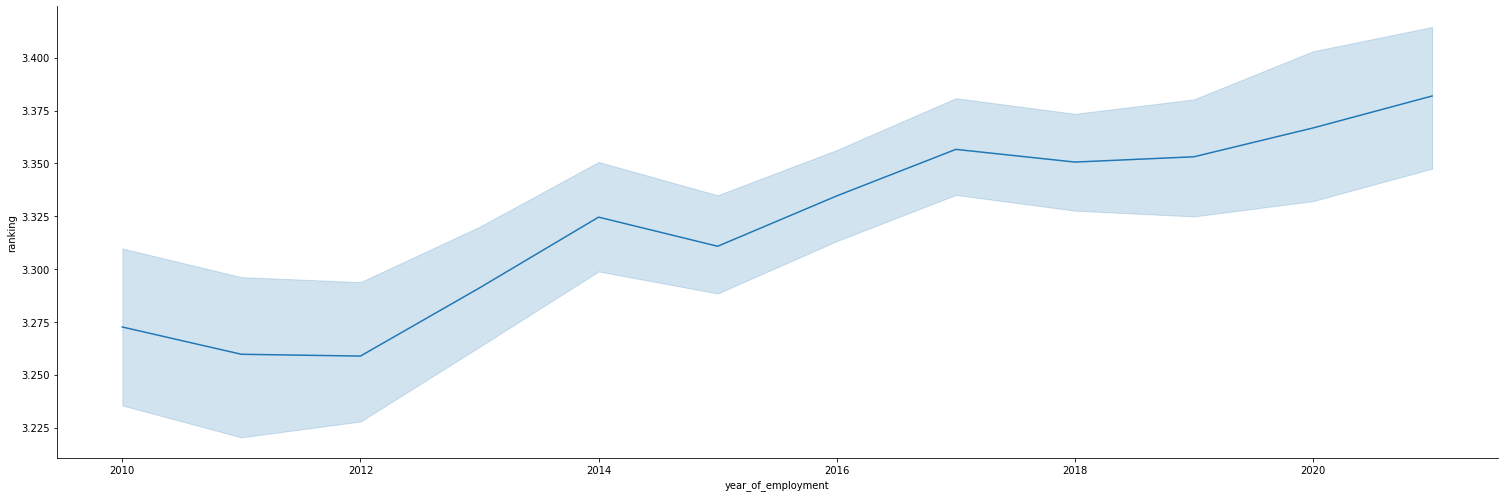

In [ ]:
first_year_leaving_df = df.drop(df[df.year_of_employment < 2010].index)
sns.relplot(
    data=first_year_leaving_df, kind="line",
    x="year_of_employment", y="ranking", height=7, aspect=3,
)

**Contrary to the results of the previous plot, there we saw that there is a tendency to leave before completing a year of work. Here we see a significant increase in the satisfaction of people who have been employed in recent years.**

# **Visualization of the common words for general critique**

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['באיזו', 'במקום', 'בשעה', 'הסיבה', 'לאיזו', 'למקום', 'מאיזו', 'מידה', 'סיבה', 'שבגללה', 'שבו', 'תכלית'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


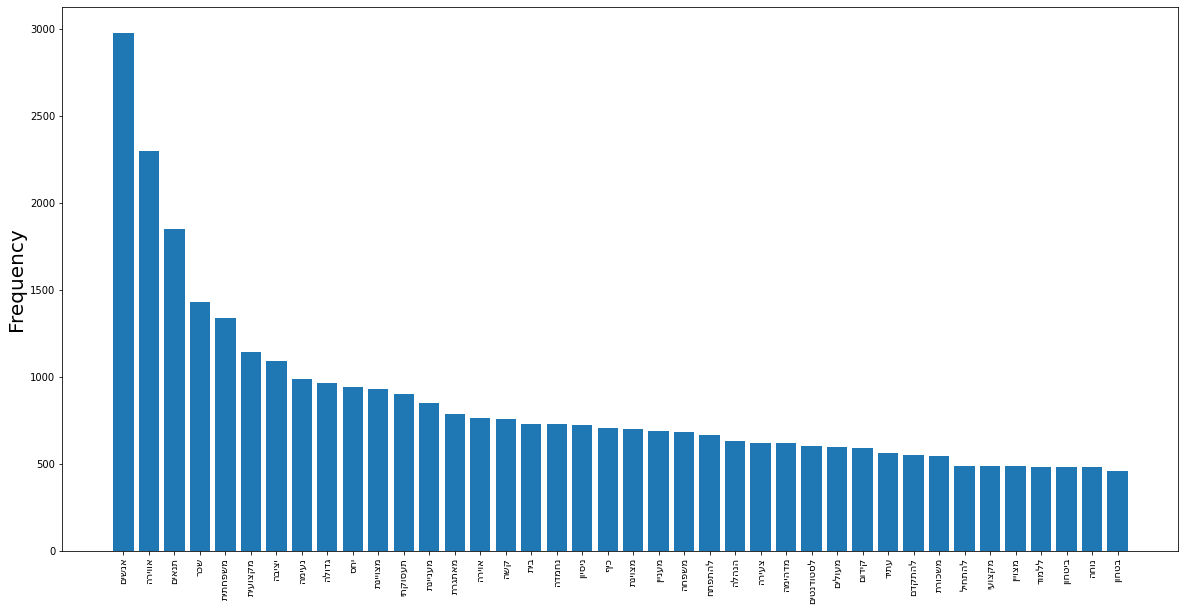

In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Data/whole_economy_data.csv', index_col =0)

###Df.review_essence into text file###
# textfile = open("review_essence.txt", "w")
# for review in df['review_essence']:
#     textfile.write(review + "\n")
# textfile.close()

review = open('/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Text files/review_essence.txt', 'rb')
lines = []
for line in review:
    line = line.strip().lower()
    line = line.decode('UTF-8', 'ignore')
    if len(line)==0:
        continue
    lines.append(line)
review.close()
text = " ".join(lines)


vectorizer=CountVectorizer(stop_words = hebrew_stop_words)
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) # create a dictionary from the first (and only) row

#Invert words for bug fixes in plot
oldkeys = list(freqDist.keys())
vals = list(freqDist.values())
newkeys = []
for key in oldkeys:
    newkeys.append(get_display(key))
freqDist_hebrew = {k: v for k, v in zip(newkeys, vals)}
freqDist_hebrew=dict(sorted(freqDist_hebrew.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

plt.figure(figsize=(20,10))
topK=40
plt.bar(list(freqDist_hebrew.keys())[:topK], list(freqDist_hebrew.values())[:topK])
plt.xticks(list(freqDist_hebrew.keys())[:topK], rotation='vertical')
plt.ylabel('Frequency', fontsize=20)
plt.show()

**The most common words in general review**

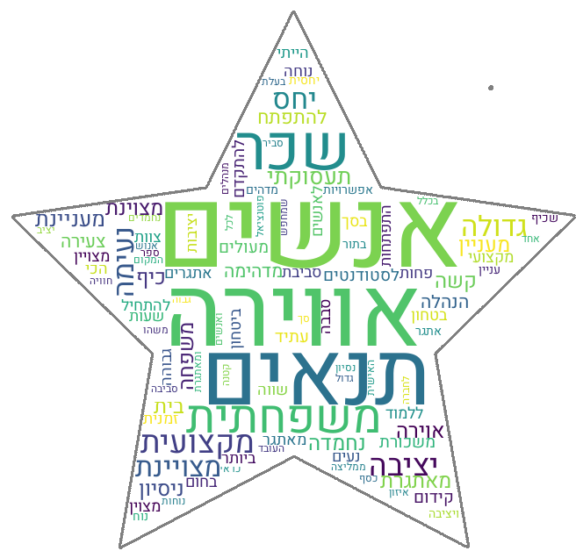

In [ ]:
def transform_format(val):
    if val != 0:
        return 255
    else:
        return val

image_file=Image.open("/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/images/Black_Star.png")
image_file=image_file.convert('1')
star_mask = np.array(image_file)

transformed_star_mask = np.ndarray((star_mask.shape[0],star_mask.shape[1]), np.int32)

for i in range(len(star_mask)):
    transformed_star_mask[i] = list(map(transform_format, star_mask[i]))

wc = WordCloud(background_color="white", max_words=100, mask=transformed_star_mask,contour_width=3, contour_color='gray', font_path='/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Fonts/Heebo-VariableFont_wght.ttf')

wc=wc.generate_from_frequencies(freqDist_hebrew)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



**In the star plot we see here, you can see that the most common words in the general review are: people, environment, work benefits, family, salary, etc ...**

# **Visualization of the common words for the advantages at work**

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['באיזו', 'במקום', 'בשעה', 'הסיבה', 'לאיזו', 'למקום', 'מאיזו', 'מידה', 'סיבה', 'שבגללה', 'שבו', 'תכלית'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


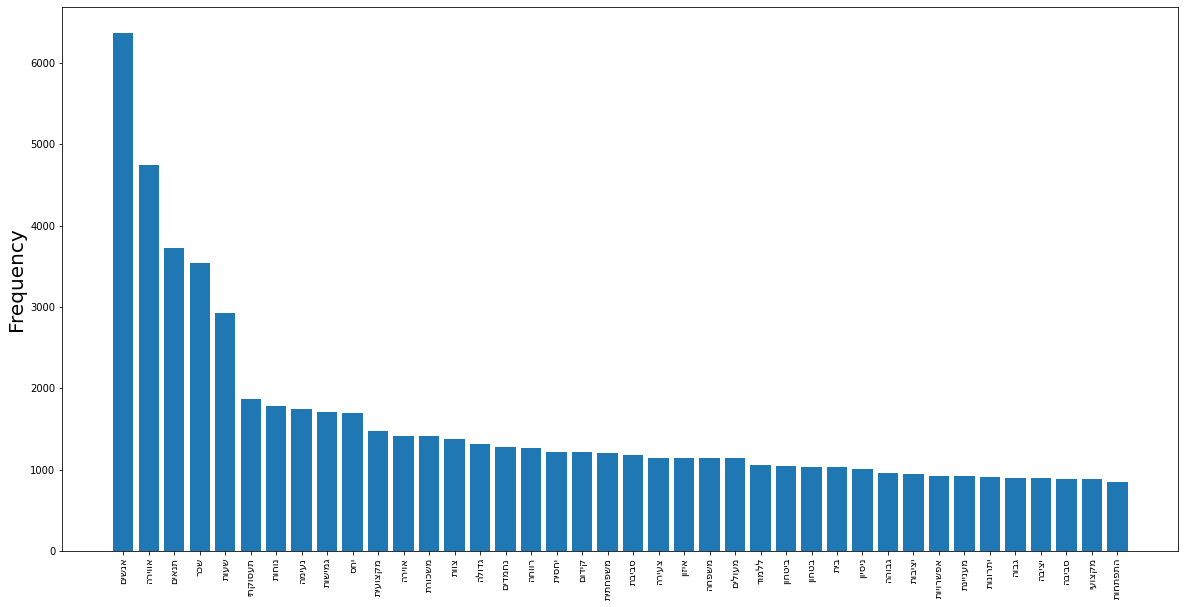

In [ ]:
###Df.advantages into text file###
# textfile = open("advantages.txt", "w")
# for advantage in df['advantages']:
#     textfile.write(advantage + "\n")
# textfile.close()

advantages = open('/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Text files/advantages.txt', 'rb')
lines = []
for line in advantages:
    line = line.strip().lower()
    line = line.decode('UTF-8', 'ignore')
    if len(line)==0:
        continue
    lines.append(line)
advantages.close()
text = " ".join(lines)

vectorizer=CountVectorizer(stop_words = hebrew_stop_words)
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) # create a dictionary from the first (and only) row

#Invert words for bug fixes in plot
oldkeys = list(freqDist.keys())
vals = list(freqDist.values())
newkeys = []
for key in oldkeys:
    newkeys.append(get_display(key))
freqDist_hebrew = {k: v for k, v in zip(newkeys, vals)}
freqDist_hebrew=dict(sorted(freqDist_hebrew.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

plt.figure(figsize=(20,10))
topK=40
plt.bar(list(freqDist_hebrew.keys())[:topK], list(freqDist_hebrew.values())[:topK])
plt.xticks(list(freqDist_hebrew.keys())[:topK], rotation='vertical')
plt.ylabel('Frequency', fontsize=20)
plt.show()



  

**The most common words under the benefits column in data**

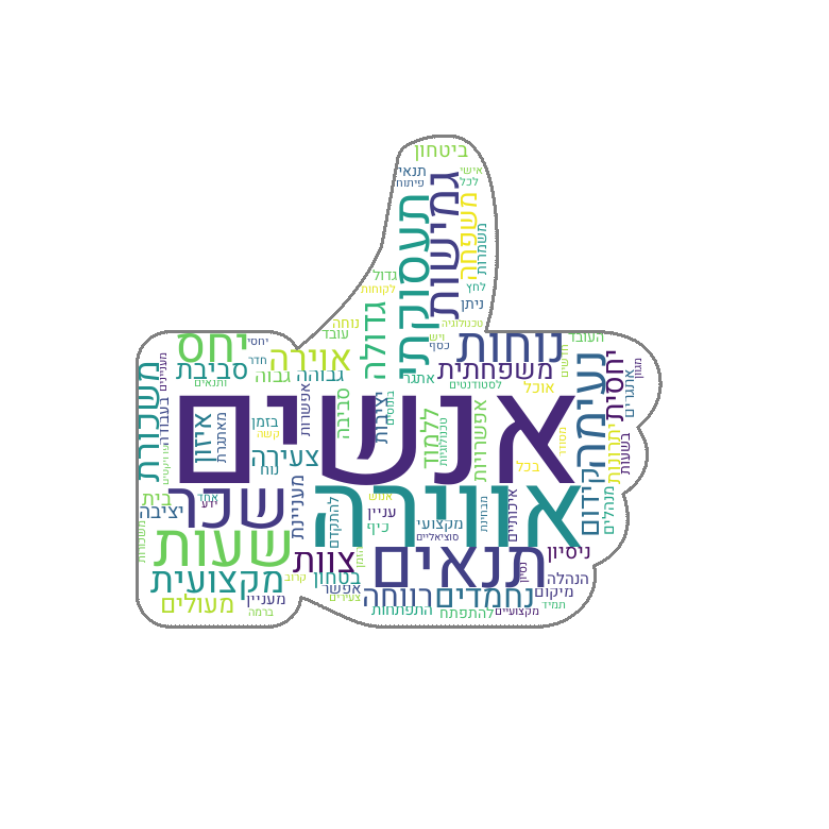

In [ ]:
def transform_format(val):
    if val != 0:
        return 255
    else:
        return val

image_file=Image.open("/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/images/Like.png")
image_file=image_file.convert('1')
star_mask = np.array(image_file)

transformed_star_mask = np.ndarray((star_mask.shape[0],star_mask.shape[1]), np.int32)

for i in range(len(star_mask)):
    transformed_star_mask[i] = list(map(transform_format, star_mask[i]))

wc = WordCloud(background_color="white", max_words=100, mask=transformed_star_mask,contour_width=3, contour_color='gray', font_path='/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Fonts/Heebo-VariableFont_wght.ttf')

wc=wc.generate_from_frequencies(freqDist_hebrew)
plt.figure(figsize=[30,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**In this "Like" plot you can see that the benefits that people point to are: people, environment, work benefits, comfort, salary, etc ...**




# **Visualization of the common words for the disadvantages at work**

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['באיזו', 'במקום', 'בשעה', 'הסיבה', 'לאיזו', 'למקום', 'מאיזו', 'מידה', 'סיבה', 'שבגללה', 'שבו', 'תכלית'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


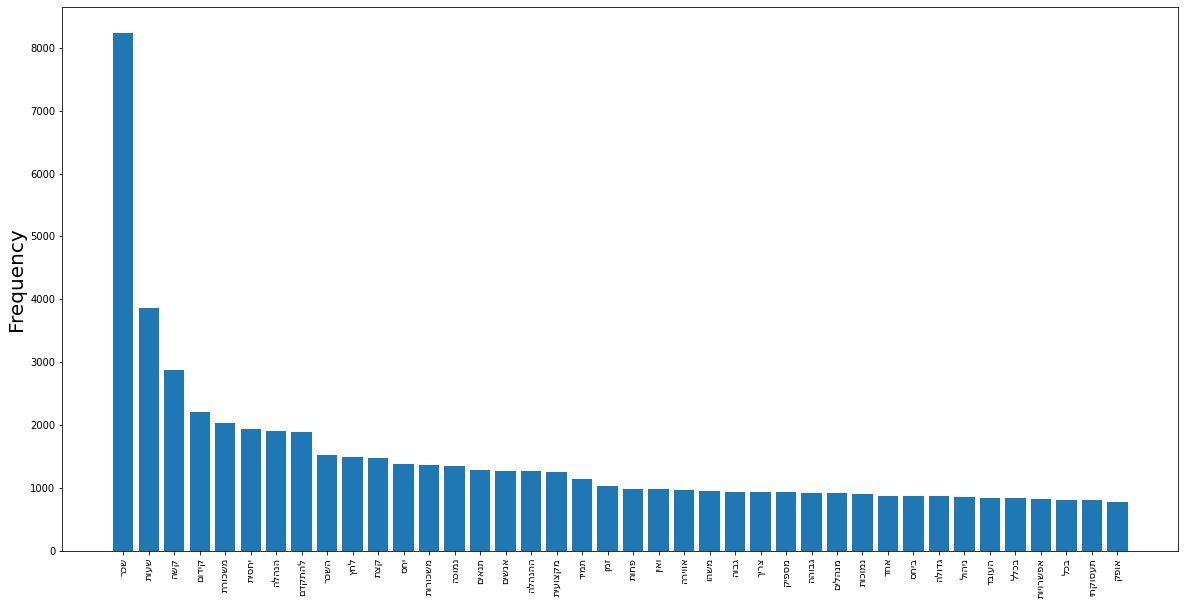

In [ ]:
##Df.disadvantages into text file###
# textfile = open("disadvantages.txt", "w")
# for disadvantage in df['disadvantages']:
#     textfile.write(disadvantage + "\n")
# textfile.close()

disadvantages = open('/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Text files/disadvantages.txt', 'rb')
lines = []
for line in disadvantages:
    line = line.strip().lower()
    line = line.decode('UTF-8', 'ignore')
    if len(line)==0:
        continue
    lines.append(line)
disadvantages.close()
text = " ".join(lines)

vectorizer=CountVectorizer(stop_words = hebrew_stop_words)
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) # create a dictionary from the first (and only) row

#Invert words for bug fixes in plot
oldkeys = list(freqDist.keys())
vals = list(freqDist.values())
newkeys = []
for key in oldkeys:
    newkeys.append(get_display(key))
freqDist_hebrew = {k: v for k, v in zip(newkeys, vals)}
freqDist_hebrew=dict(sorted(freqDist_hebrew.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

plt.figure(figsize=(20,10))
topK=40
plt.bar(list(freqDist_hebrew.keys())[:topK], list(freqDist_hebrew.values())[:topK])
plt.xticks(list(freqDist_hebrew.keys())[:topK], rotation='vertical')
plt.ylabel('Frequency', fontsize=20)
plt.show()



  

**The most common words in the disadvantages column**

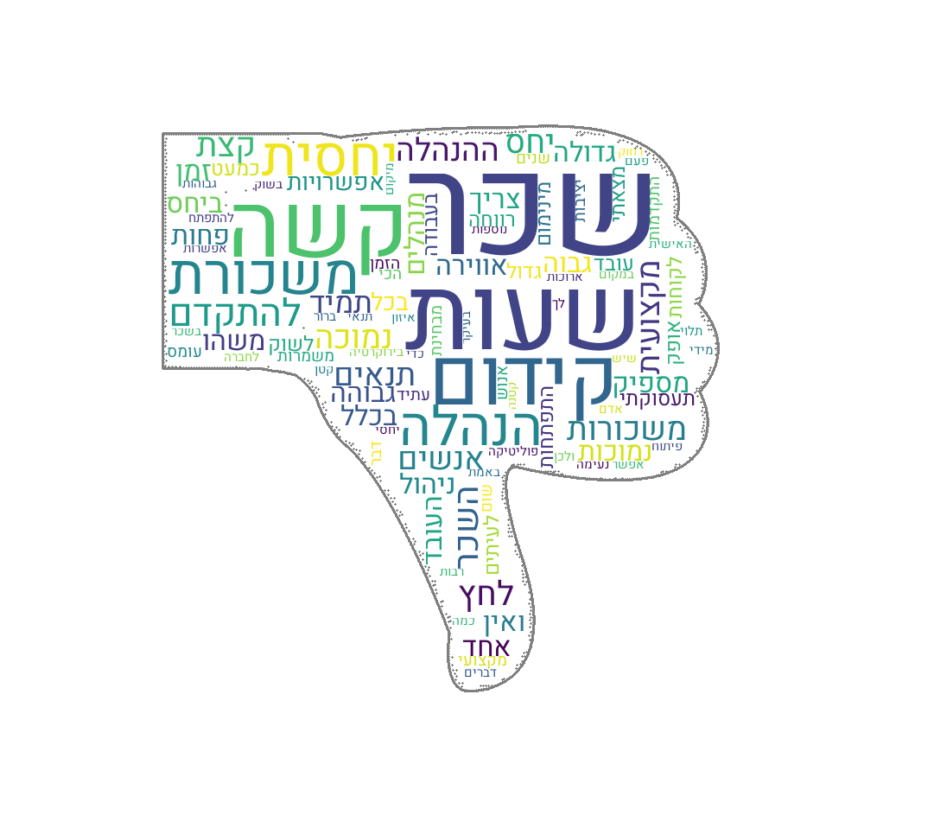

In [ ]:
def transform_format(val):
    if val != 0:
        return 255
    else:
        return val

image_file=Image.open("/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/images/Dislike.png")
image_file=image_file.convert('1')
star_mask = np.array(image_file)

transformed_star_mask = np.ndarray((star_mask.shape[0],star_mask.shape[1]), np.int32)

for i in range(len(star_mask)):
    transformed_star_mask[i] = list(map(transform_format, star_mask[i]))

wc = WordCloud(background_color="white", max_words=100, mask=transformed_star_mask,contour_width=3, contour_color='gray', font_path='/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Fonts/Heebo-VariableFont_wght.ttf')

wc=wc.generate_from_frequencies(freqDist_hebrew)
plt.figure(figsize=[30,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**In this "Dislike" plot you can see that the disadvantages that people point to are: salary, long hours, pressure, hard work, promotion, management and etc...**


